<a href="https://colab.research.google.com/github/being-techie/Board_infinity/blob/main/Python_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                             Python Assignment -1 
                   
                                             

In [ ]:
 import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("H:/BI/Python/Ecommerce - UK Retailer.csv" , engine= 'python')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 1. Perform basic EDA 

### a. Boxplot-All numerical values

<AxesSubplot:>

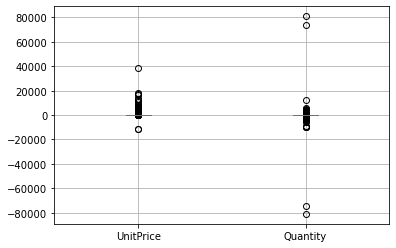

In [ ]:
df.boxplot(['UnitPrice','Quantity'],grid=True)

### b.Histogram-All numerical values


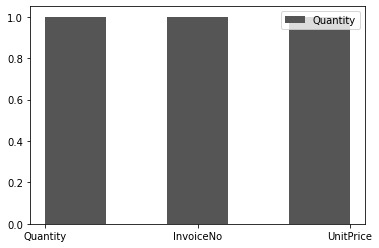

In [ ]:

plt.hist(['Quantity','InvoiceNo','UnitPrice'],bins=5,color=['#555555'],label=['Quantity','InvoiceNo','UnitPrice'])
plt.legend()

### c. Distribution plot-All numerical values

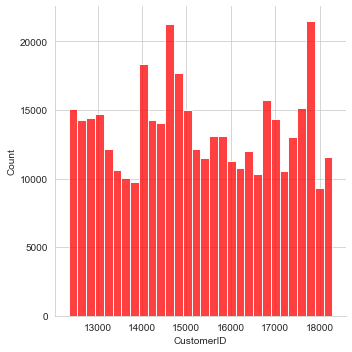

In [ ]:
sns.set_style('whitegrid')
sns.displot(df['CustomerID'],kde=False, color ='red' , bins =30)

### d. Aggregation for all numerical Columns

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df = df[df['UnitPrice'] > 0]
df.describe()


,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,406789.000000
mean,9.845904,4.673648,15287.795830
std,215.412652,94.614722,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### e. Unique values across all colums

In [ ]:
df.nunique()

InvoiceNo      23796
StockCode       3938
Description     4042
Quantity         510
InvoiceDate    21802
UnitPrice       1628
CustomerID      4371
Country           38
dtype: int64

### f. Duplicate values across all columns

In [ ]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### g. Correlation map-All numerical values

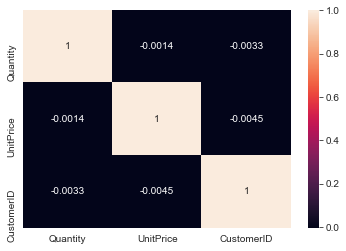

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### h. Regression plot-All numerical values

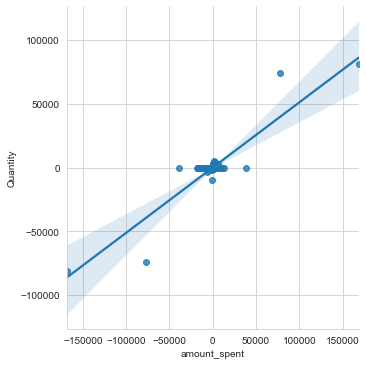

In [ ]:

sns.lmplot(x ='amount_spent',y= 'Quantity',data=df)

### i. Barplot-Every Categorical Variable vs every Numerical Variable

<AxesSubplot:xlabel='Country', ylabel='amount_spent'>

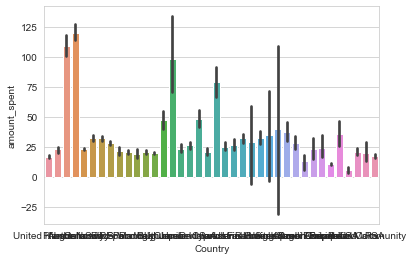

In [ ]:
 sns.barplot(x="Country" , y="amount_spent",data=df)


### j. Pairplot-All numerical values

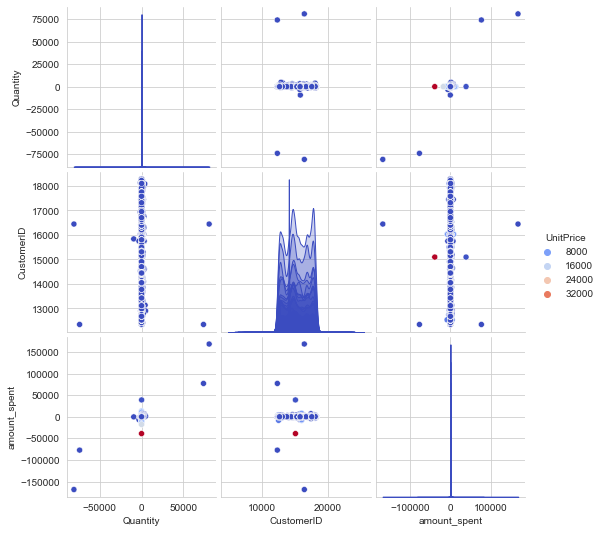

In [ ]:
sns.pairplot(df , hue = 'UnitPrice' , palette = 'coolwarm')

# 2. Checking missing values and replace them

In [ ]:
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      132565
Country              0
amount_spent         0
dtype: int64

<AxesSubplot:xlabel='CustomerID'>

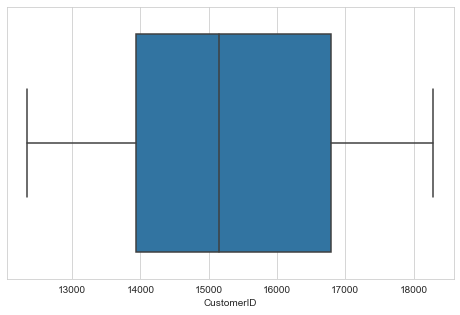

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('CustomerID',data=df)

#### The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"

In [ ]:
m = np.mean(df['CustomerID'])
m

15281.266796824417

In [ ]:
df['CustomerID'].fillna(m,inplace=True)

In [ ]:
df['CustomerID'].isnull().sum()

0

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df['Description'].isnull().sum()

0

In [ ]:
print(df['Description'].value_counts())

WHITE HANGING HEART T-LIGHT HOLDER    2353
REGENCY CAKESTAND 3 TIER              2187
JUMBO BAG RED RETROSPOT               2153
PARTY BUNTING                         1719
LUNCH BAG RED RETROSPOT               1625
                                      ... 
GREEN WITH METAL BAG CHARM               1
ASSORTED COLOUR SILK GLASSES CASE        1
BIRTHDAY BANNER TAPE                     1
MINT DINER CLOCK                         1
RUBY GLASS NECKLACE 42"                  1
Name: Description, Length: 4042, dtype: int64


In [ ]:
df['Description']= df['Description'].fillna(df['Description'].mode()[0])

In [ ]:
df['Description'].isnull().sum()

0

# 3. Remove duplicate rows

In [ ]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [ ]:
df.drop(['CustomerID'], axis =1,inplace= False )


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,France,16.60


# 4.Removes rows with negative values

In [ ]:
df['Quantity'].value_counts(0)

1      144095
2       81116
12      60839
6       40627
4       38351
        ...  
137         1
648         1
136         1
133         1
512         1
Name: Quantity, Length: 510, dtype: int64

In [ ]:
 df._get_numeric_data()
df[df<0]=0


TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


# 5.Add column month, day and hour for invoice 

In [ ]:
#changing the object to date time format
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 534129, dtype: datetime64[ns]

In [ ]:

df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Time']=df['InvoiceDate'].dt.time

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Year,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12:50:00


# 6.Orders made by the customers

In [ ]:
df['Quantity'].value_counts().sum()

534129

In [ ]:
orders=df.groupby(by=['CustomerID','Country'],sort=True, as_index=False)['InvoiceNo'].count().head()

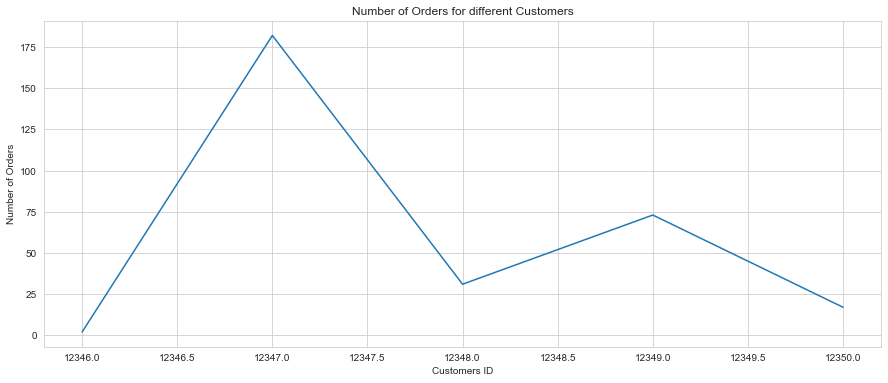

In [ ]:
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

# 7.Top 5 customers with high no of orders

In [ ]:
top5=df.groupby(by=['CustomerID'],as_index=False)['Quantity'].sum().head()

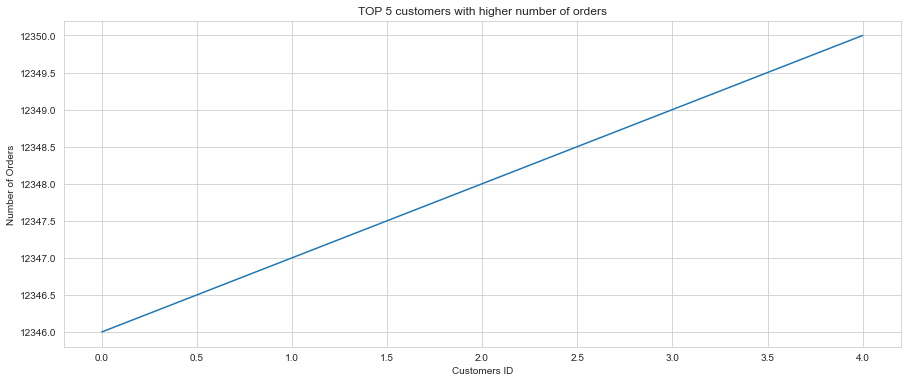

In [ ]:
plt.subplots(figsize=(15,6))
plt.plot(top5.CustomerID)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('TOP 5 customers with higher number of orders')
plt.show()

In [ ]:
top5.head(5)

,CustomerID,Quantity
0,12346.0,0
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


# 8.Money spent by the customers

In [ ]:
df['amount_spent'] = df['Quantity'] * df['UnitPrice']
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()


In [ ]:
money_spent

,CustomerID,Country,amount_spent
0,12346.0,United Kingdom,0.00
1,12347.0,Iceland,4310.00
2,12348.0,Finland,1797.24
3,12349.0,Italy,1757.55
4,12350.0,Norway,334.40
...,...,...,...
4374,18280.0,United Kingdom,180.60
4375,18281.0,United Kingdom,80.82
4376,18282.0,United Kingdom,176.60
4377,18283.0,United Kingdom,2045.53


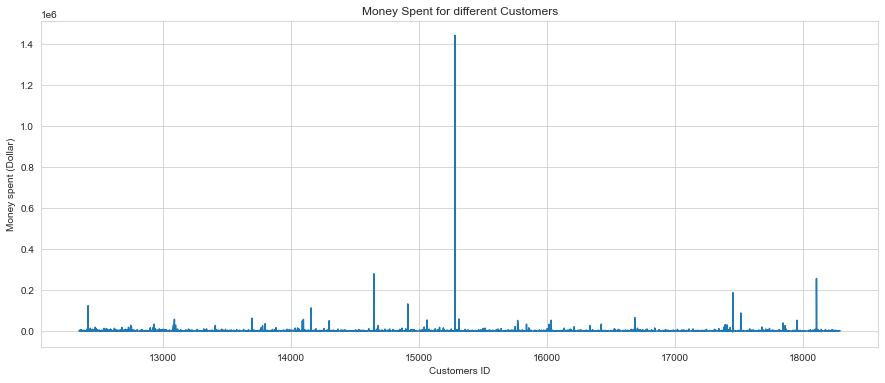

In [ ]:
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Year,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12:50:00


# 9.Top 5 customer with their country with highest money spent

In [ ]:
m =money_spent.sort_values(by='amount_spent', ascending=False).head()
m

,CustomerID,Country,amount_spent
2188,15281.266797,United Kingdom,1442096.15
1710,14646.000000,Netherlands,279489.02
4249,18102.000000,United Kingdom,256438.49
3774,17450.000000,United Kingdom,187322.17
1902,14911.000000,EIRE,132458.73


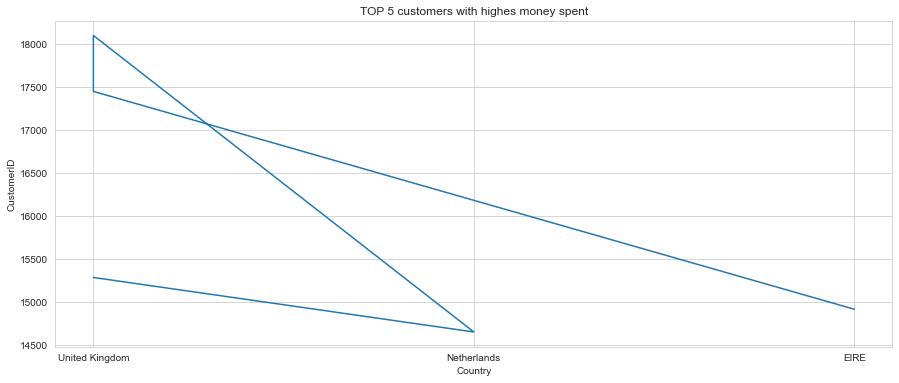

In [ ]:
plt.subplots(figsize=(15,6))
plt.plot(m.Country , m.CustomerID)
plt.xlabel('Country')
plt.ylabel('CustomerID')
plt.title('TOP 5 customers with highes money spent')
plt.show()

# 10.No of orders per month

In [ ]:
order_mon = df.groupby(by=['Month'], as_index=False)['InvoiceNo'].count()

In [ ]:
order_mon

,Month,InvoiceNo
0,1,34760
1,2,27352
2,3,36193
3,4,29440
4,5,36538
5,6,36425
6,7,39079
7,8,34931
8,9,49701
9,10,59731


# 11.No of orders per day 

In [ ]:
df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]      895
[2]      792
[3]      647
[4]      803
[5]      872
[6]     1035
[7]      991
[8]      992
[9]      819
[10]     875
[11]     830
[12]     640
[13]     737
[14]     904
[15]     723
[16]     780
[17]     882
[18]     811
[19]     664
[20]     848
[21]     844
[22]     679
[23]     739
[24]     763
[25]     683
[26]     558
[27]     709
[28]     789
[29]     480
[30]     571
[31]     441
Name: Day, dtype: int64

# 12.No of orders per hour

In [ ]:
df['hour']=df['InvoiceDate'].dt.hour



In [ ]:
d=df.groupby('InvoiceNo')['hour'].unique()
d.value_counts().iloc[:-1].sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[6]       22
[7]       31
[8]      620
[9]     1718
[10]    2758
[11]    2918
[12]    3717
[13]    3183
[14]    2857
[15]    2737
[16]    1735
[17]     971
[18]     281
[19]     219
[20]      28
Name: hour, dtype: int64

# 13. How many orders for each country? 



In [ ]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

In [ ]:
group_country_orders

Country
Saudi Arabia                10
Bahrain                     19
Czech Republic              30
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         57
European Community          61
United Arab Emirates        68
Malta                      127
Greece                     146
Canada                     151
Iceland                    182
Singapore                  229
Hong Kong                  284
USA                        291
Israel                     294
Poland                     341
Japan                      358
Denmark                    389
Austria                    401
Unspecified                442
Sweden                     461
Cyprus                     611
Finland                    695
Channel Islands            757
Italy                      803
Norway                    1085
Australia                 1255
Portugal                  1510
Switzerland               1993
Belgium                   2069


# 14. Orders trend across months 

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'amount_spent', 'Year', 'Month',
       'Day', 'Time', 'hour'],
      dtype='object')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Year,Month,Day,Time,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,08:26:00,8


Text(0.5, 0, 'Month')

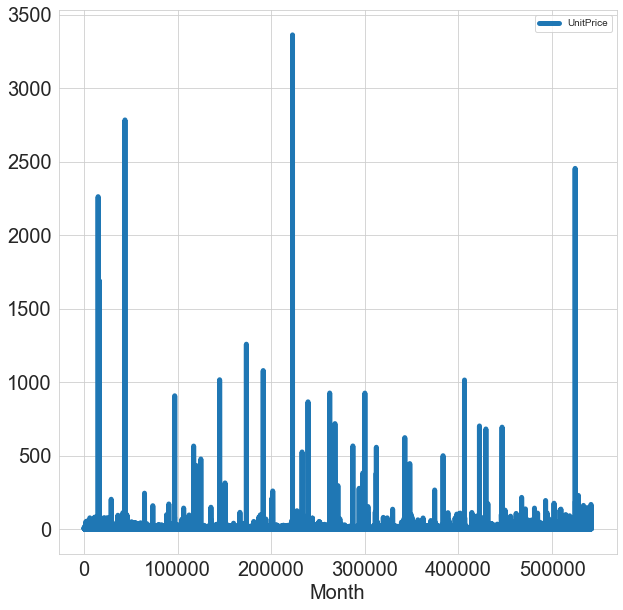

In [ ]:
y=df[['UnitPrice']]
y.rolling(12).mean().plot(figsize=(10,10), linewidth=5,fontsize=20)

plt.xlabel('Month' , fontsize= 20)

Text(0.5, 0, 'Month')

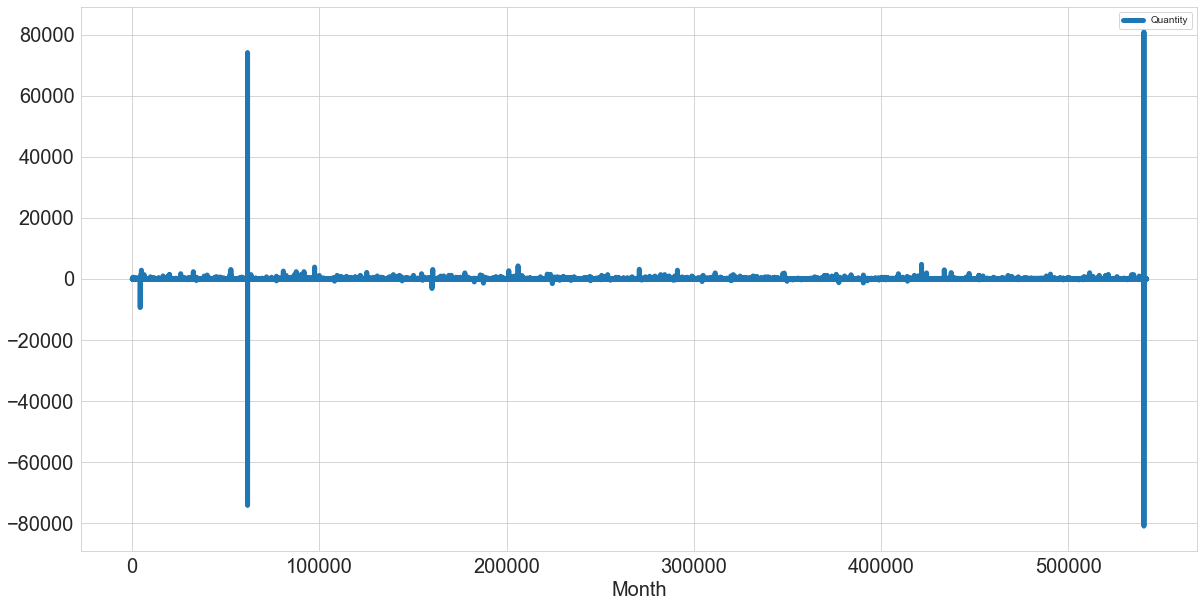

In [ ]:
df[['Quantity']].plot(figsize=(20,10),linewidth =5,fontsize=20)
plt.xlabel('Month',fontsize=20)

#  15. How much money spent by each country?

In [ ]:
moneyspent_country=df.groupby(by='Country')['amount_spent'].sum()
moneyspent_country

Country
Australia               1.370098e+05
Austria                 1.015432e+04
Bahrain                 5.484000e+02
Belgium                 4.091096e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.007639e+04
Cyprus                  1.285876e+04
Czech Republic          7.077200e+02
Denmark                 1.876814e+04
EIRE                    2.629934e+05
European Community      1.291750e+03
Finland                 2.232674e+04
France                  1.973171e+05
Germany                 2.215095e+05
Greece                  4.710520e+03
Hong Kong               9.908240e+03
Iceland                 4.310000e+03
Israel                  7.901970e+03
Italy                   1.689051e+04
Japan                   3.534062e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.505470e+03
Netherlands             2.846615e+05
Norway                  3.516346e+04
Poland                  7.2131